In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'xgboost'

In [242]:
pd.set_option('max_columns', None)
pd.set_option("max_rows", 100)


#### Loading datasets

In [243]:
# Importing data


#Train data
df_train = pd.read_csv("train.csv")
 
# Checking the dimensions of this dataset
print(df_train.shape)

(20453, 800)


In [244]:
# Printing the Training set
df_train.head()

row_id  scout_id  rating_num  winner   team  competitionId  player_position_1  player_position_2  player_height  player_weight  player_general_var_0  player_general_var_1  player_general_var_2  player_general_var_3  player_general_var_4  player_general_var_5  player_positional_raw_var_0  player_positional_raw_var_1  player_positional_raw_var_2  player_positional_raw_var_3  player_defensive_raw_var_4  player_defensive_raw_var_5  player_other_raw_var_6  player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  player_other_raw_var_10  player_offensive_raw_var_11  player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  player_positional_raw_var_15  player_positional_raw_var_16  player_positional_raw_var_17  player_other_raw_var_18  player_other_raw_var_19  player_other_raw_var_20  player_positional_raw_var_21  player_positional_raw_var_22  player_positional_raw_var_23  player_other_raw_var_24  player_other_raw_var_25  player_other_raw_var_26  player_other_raw_var_27  player_other_raw_var_28  player_other_raw_var_29  player_other_raw_var_30  player_offensive_raw_var_31  player_offensive_raw_var_32  player_other_raw_var_33  player_other_raw_var_34  player_other_raw_var_35  player_other_raw_var_36  player_other_raw_var_37  player_other_raw_var_38  player_other_raw_var_39  player_other_raw_var_40  player_other_raw_var_41  player_defensive_raw_var_42  player_defensive_raw_var_43  player_other_raw_var_44  player_other_raw_var_45  player_offensive_raw_var_46  player_other_raw_var_47  player_defensive_raw_var_48  player_offensive_raw_var_49  player_offensive_raw_var_50  player_other_raw_var_51  player_defensive_raw_var_52  player_offensive_raw_var_53  player_other_raw_var_54  player_positional_raw_var_55  player_other_raw_var_56  player_other_raw_var_57  player_other_raw_var_58  player_other_raw_var_59  player_offensive_raw_var_60  player_defensive_raw_var_61  player_defensive_raw_var_62  player_other_raw_var_63  player_other_raw_var_64  player_defensive_raw_var_65  player_defensive_raw_var_66  player_defensive_raw_var_67  player_other_raw_var_68  player_other_raw_var_69  player_defensive_raw_var_70  player_general_raw_var_71  player_general_raw_var_72  player_offensive_raw_var_73  player_defensive_raw_var_74  player_other_raw_var_75  player_other_raw_var_76  player_offensive_raw_var_77  player_general_raw_var_78  player_offensive_raw_var_79  player_other_raw_var_80  player_other_raw_var_81  player_other_raw_var_82  player_other_raw_var_83  player_other_raw_var_84  player_other_raw_var_85  player_positional_raw_var_86  player_offensive_raw_var_87  player_other_raw_var_88  player_other_raw_var_89  player_other_raw_var_90  player_other_raw_var_91  player_defensive_raw_var_92  player_defensive_raw_var_93  player_defensive_raw_var_94  player_defensive_raw_var_95  player_other_raw_var_96  player_defensive_raw_var_97  player_other_raw_var_98  player_other_raw_var_99  player_defensive_raw_var_100  player_other_raw_var_101  player_offensive_raw_var_102  player_other_raw_var_103  player_other_raw_var_104  player_offensive_raw_var_105  player_other_raw_var_106  player_other_raw_var_107  player_other_raw_var_108  player_other_raw_var_109  player_positional_raw_var_110  player_other_raw_var_111  player_other_raw_var_112  player_other_raw_var_113  player_general_raw_var_114  player_offensive_raw_var_115  player_offensive_raw_var_116  player_other_raw_var_117  player_other_raw_var_118  player_other_raw_var_119  player_offensive_raw_var_120  player_other_raw_var_121  player_offensive_raw_var_122  player_other_raw_var_123  player_other_raw_var_124  player_other_raw_var_125  player_offensive_raw_var_126  player_other_raw_var_127  player_other_raw_var_128  player_offensive_raw_var_129  player_offensive_raw_var_130  player_offensive_raw_var_131  player_other_raw_var_132  player_offensive_raw_var_133  player_other_raw_var_134  player_other_raw_var_135  player_other_raw_var_136  player_defensive_raw_var_137  player_offens

In [245]:

# TEst data

df_test = pd.read_csv("test.csv")

# Checking the dimensions of this dataset
print(df_test.shape)

(8774, 799)


In [246]:
# Checking if column headings are the same in both data set
miss_col1 = [x for x in df_train.columns if x not in df_test.columns]
print(f"Columns present in df_train and absent in df_test: {miss_col1}\n")


miss_col2 = [x for x in df_test.columns if x not in df_train.columns]
print(f"Columns present in df_test set and absent in df_train: {miss_col2}")

Columns present in df_train and absent in df_test: ['rating_num']

Columns present in df_test set and absent in df_train: []


#### Combine Training and Testing set

We combine them so we have more information to work with during preproessing . <br>
We can concat. them ontop of eachother

In [247]:
# Saving rating_num and row_id for later use
target = df_train['rating_num']
test_ids = df_test['row_id']

# drop them from the dataframes
train1 = df_train.drop(['rating_num','row_id'], axis = 1)
test1 = df_test.drop('row_id', axis = 1)

In [248]:
#combining our new Dataframes
combined_df = pd.concat([train1, test1], axis = 0).reset_index(drop=True)
combined_df.head()

scout_id  winner   team  competitionId  player_position_1  player_position_2  player_height  player_weight  player_general_var_0  player_general_var_1  player_general_var_2  player_general_var_3  player_general_var_4  player_general_var_5  player_positional_raw_var_0  player_positional_raw_var_1  player_positional_raw_var_2  player_positional_raw_var_3  player_defensive_raw_var_4  player_defensive_raw_var_5  player_other_raw_var_6  player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  player_other_raw_var_10  player_offensive_raw_var_11  player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  player_positional_raw_var_15  player_positional_raw_var_16  player_positional_raw_var_17  player_other_raw_var_18  player_other_raw_var_19  player_other_raw_var_20  player_positional_raw_var_21  player_positional_raw_var_22  player_positional_raw_var_23  player_other_raw_var_24  player_other_raw_var_25  player_other_raw_var_26  player_other_raw_var_27  player_other_raw_var_28  player_other_raw_var_29  player_other_raw_var_30  player_offensive_raw_var_31  player_offensive_raw_var_32  player_other_raw_var_33  player_other_raw_var_34  player_other_raw_var_35  player_other_raw_var_36  player_other_raw_var_37  player_other_raw_var_38  player_other_raw_var_39  player_other_raw_var_40  player_other_raw_var_41  player_defensive_raw_var_42  player_defensive_raw_var_43  player_other_raw_var_44  player_other_raw_var_45  player_offensive_raw_var_46  player_other_raw_var_47  player_defensive_raw_var_48  player_offensive_raw_var_49  player_offensive_raw_var_50  player_other_raw_var_51  player_defensive_raw_var_52  player_offensive_raw_var_53  player_other_raw_var_54  player_positional_raw_var_55  player_other_raw_var_56  player_other_raw_var_57  player_other_raw_var_58  player_other_raw_var_59  player_offensive_raw_var_60  player_defensive_raw_var_61  player_defensive_raw_var_62  player_other_raw_var_63  player_other_raw_var_64  player_defensive_raw_var_65  player_defensive_raw_var_66  player_defensive_raw_var_67  player_other_raw_var_68  player_other_raw_var_69  player_defensive_raw_var_70  player_general_raw_var_71  player_general_raw_var_72  player_offensive_raw_var_73  player_defensive_raw_var_74  player_other_raw_var_75  player_other_raw_var_76  player_offensive_raw_var_77  player_general_raw_var_78  player_offensive_raw_var_79  player_other_raw_var_80  player_other_raw_var_81  player_other_raw_var_82  player_other_raw_var_83  player_other_raw_var_84  player_other_raw_var_85  player_positional_raw_var_86  player_offensive_raw_var_87  player_other_raw_var_88  player_other_raw_var_89  player_other_raw_var_90  player_other_raw_var_91  player_defensive_raw_var_92  player_defensive_raw_var_93  player_defensive_raw_var_94  player_defensive_raw_var_95  player_other_raw_var_96  player_defensive_raw_var_97  player_other_raw_var_98  player_other_raw_var_99  player_defensive_raw_var_100  player_other_raw_var_101  player_offensive_raw_var_102  player_other_raw_var_103  player_other_raw_var_104  player_offensive_raw_var_105  player_other_raw_var_106  player_other_raw_var_107  player_other_raw_var_108  player_other_raw_var_109  player_positional_raw_var_110  player_other_raw_var_111  player_other_raw_var_112  player_other_raw_var_113  player_general_raw_var_114  player_offensive_raw_var_115  player_offensive_raw_var_116  player_other_raw_var_117  player_other_raw_var_118  player_other_raw_var_119  player_offensive_raw_var_120  player_other_raw_var_121  player_offensive_raw_var_122  player_other_raw_var_123  player_other_raw_var_124  player_other_raw_var_125  player_offensive_raw_var_126  player_other_raw_var_127  player_other_raw_var_128  player_offensive_raw_var_129  player_offensive_raw_var_130  player_offensive_raw_var_131  player_other_raw_var_132  player_offensive_raw_var_133  player_other_raw_var_134  player_other_raw_var_135  player_other_raw_var_136  player_defensive_raw_var_137  player_offensive_raw_var_138  pla

#### Cleaning

##### Ensure proper datatypes

In [249]:
# making a copy of data

data1 = combined_df.copy()

In [250]:

data1.select_dtypes(np.number) # Return all numeric columns

scout_id  competitionId  player_position_1  player_position_2  player_height  player_weight  player_general_var_0  player_general_var_1  player_general_var_2  player_general_var_3  player_general_var_4  player_general_var_5  player_positional_raw_var_0  player_positional_raw_var_1  player_positional_raw_var_2  player_positional_raw_var_3  player_defensive_raw_var_4  player_defensive_raw_var_5  player_other_raw_var_6  player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  player_other_raw_var_10  player_offensive_raw_var_11  player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  player_positional_raw_var_15  player_positional_raw_var_16  player_positional_raw_var_17  player_other_raw_var_18  player_other_raw_var_19  player_other_raw_var_20  player_positional_raw_var_21  player_positional_raw_var_22  player_positional_raw_var_23  player_other_raw_var_24  player_other_raw_var_25  player_other_raw_var_26  player_other_raw_var_27  player_other_raw_var_28  player_other_raw_var_29  player_other_raw_var_30  player_offensive_raw_var_31  player_offensive_raw_var_32  player_other_raw_var_33  player_other_raw_var_34  player_other_raw_var_35  player_other_raw_var_36  player_other_raw_var_37  player_other_raw_var_38  player_other_raw_var_39  player_other_raw_var_40  player_other_raw_var_41  player_defensive_raw_var_42  player_defensive_raw_var_43  player_other_raw_var_44  player_other_raw_var_45  player_offensive_raw_var_46  player_other_raw_var_47  player_defensive_raw_var_48  player_offensive_raw_var_49  player_offensive_raw_var_50  player_other_raw_var_51  player_defensive_raw_var_52  player_offensive_raw_var_53  player_other_raw_var_54  player_positional_raw_var_55  player_other_raw_var_56  player_other_raw_var_57  player_other_raw_var_58  player_other_raw_var_59  player_offensive_raw_var_60  player_defensive_raw_var_61  player_defensive_raw_var_62  player_other_raw_var_63  player_other_raw_var_64  player_defensive_raw_var_65  player_defensive_raw_var_66  player_defensive_raw_var_67  player_other_raw_var_68  player_other_raw_var_69  player_defensive_raw_var_70  player_general_raw_var_71  player_general_raw_var_72  player_offensive_raw_var_73  player_defensive_raw_var_74  player_other_raw_var_75  player_other_raw_var_76  player_offensive_raw_var_77  player_general_raw_var_78  player_offensive_raw_var_79  player_other_raw_var_80  player_other_raw_var_81  player_other_raw_var_82  player_other_raw_var_83  player_other_raw_var_84  player_other_raw_var_85  player_positional_raw_var_86  player_offensive_raw_var_87  player_other_raw_var_88  player_other_raw_var_89  player_other_raw_var_90  player_other_raw_var_91  player_defensive_raw_var_92  player_defensive_raw_var_93  player_defensive_raw_var_94  player_defensive_raw_var_95  player_other_raw_var_96  player_defensive_raw_var_97  player_other_raw_var_98  player_other_raw_var_99  player_defensive_raw_var_100  player_other_raw_var_101  player_offensive_raw_var_102  player_other_raw_var_103  player_other_raw_var_104  player_offensive_raw_var_105  player_other_raw_var_106  player_other_raw_var_107  player_other_raw_var_108  player_other_raw_var_109  player_positional_raw_var_110  player_other_raw_var_111  player_other_raw_var_112  player_other_raw_var_113  player_general_raw_var_114  player_offensive_raw_var_115  player_offensive_raw_var_116  player_other_raw_var_117  player_other_raw_var_118  player_other_raw_var_119  player_offensive_raw_var_120  player_other_raw_var_121  player_offensive_raw_var_122  player_other_raw_var_123  player_other_raw_var_124  player_other_raw_var_125  player_offensive_raw_var_126  player_other_raw_var_127  player_other_raw_var_128  player_offensive_raw_var_129  player_offensive_raw_var_130  player_offensive_raw_var_131  player_other_raw_var_132  player_offensive_raw_var_133  player_other_raw_var_134  player_other_raw_var_135  player_other_raw_var_136  player_defensive_raw_var_137  player_offensive_raw_var_138  player_other_raw_v

Some features are embedded as numeric but actuallly should be categorical <br>
Such fatures should be set to string so we can treat them properly in the coming stages

Let us first check for null values before converting to string

In [251]:
print(combined_df['scout_id'].isna().sum())
print(combined_df['competitionId'].isna().sum())
print(combined_df['player_position_1'].isna().sum())
print(combined_df['player_position_2'].isna().sum())

0
1
150
150


player_position_1 and  player_position_2 apprears to have some missing values

In [252]:
# drop empty values
data1['competitionId'].dropna(inplace= True)
data1['player_position_1'].dropna(inplace= True)
data1['player_position_2'].dropna(inplace= True)

- scout_id was encoded as int
- competition_Id was encoded asint
- player_position_1 was encoded as float
- player_position_2 was encoded as float

we would proceed to converting to string

In [253]:
# Converting to string
data1['scout_id'] = data1['scout_id'].astype(str)
data1['competitionId'] = data1['competitionId'].astype(str)
data1['player_position_1'] = data1['player_position_1'].astype(str)
data1['player_position_2'] = data1['player_position_2'].astype(str)

In [879]:
#Checking
data1['player_position_1']

0         7.0
1         3.0
2        11.0
3        17.0
4        10.0
         ... 
29222    11.0
29223    16.0
29224     1.0
29225     1.0
29226     3.0
Name: player_position_1, Length: 29227, dtype: object

##### Fill missing values 

##### Categorical

In [255]:
data1.select_dtypes('object').isna().sum()

scout_id             0
winner               0
team                 1
competitionId        0
player_position_1    0
player_position_2    0
dtype: int64

team has one missing value

In [256]:
data1['team'].dropna(inplace= True)

All categorical variables have no missing values

##### Numeric

In [258]:
# Numeric columns with missing values
data1.select_dtypes(np.number).loc[:, data1.isna().sum()>0].columns

Index(['player_height', 'player_weight', 'player_positional_raw_var_0',
       'player_positional_raw_var_1', 'player_positional_raw_var_2',
       'player_positional_raw_var_3', 'player_defensive_raw_var_4',
       'player_defensive_raw_var_5', 'player_other_raw_var_6',
       'player_offensive_raw_var_7',
       ...
       'team2_defensive_derived_var_10', 'team2_offensive_derived_var_11',
       'team2_offensive_derived_var_12', 'team2_offensive_derived_var_13',
       'team2_offensive_derived_var_14', 'team2_defensive_derived_var_15',
       'team2_offensive_derived_var_16', 'team2_defensive_derived_var_17',
       'team2_offensive_derived_var_18', 'team2_offensive_derived_var_19'],
      dtype='object', length=786)

In [259]:
data1.select_dtypes(np.number).isna().sum().sum()

3146560

We have quite a number of numeric missing values

In [833]:
# make copy of train2 before cleaning

data2 = data1.copy()

Some columns are completely empty, we cant fill with the mode so we would be dropping them

In [834]:
# Missing or completely zero cols
miss_cols = [
    'team2_other_raw_var_19','team1_other_raw_var_50','team1_other_raw_var_72','team1_other_raw_var_19',
    'team1_other_raw_var_31','team1_other_raw_var_33','team1_other_raw_var_92','team1_other_raw_var_82',
    'team2_other_raw_var_72','team1_other_raw_var_38','team1_other_raw_var_40','team1_other_raw_var_43',
    'team2_other_raw_var_92','team1_other_ratio_var_33','team1_other_ratio_var_32','team2_other_raw_var_82',
    'team2_other_raw_var_51','team2_other_raw_var_50','team2_other_raw_var_31','team1_other_raw_var_51',
    'team2_other_ratio_var_32','team2_other_raw_var_33','team2_other_ratio_var_33','team2_other_raw_var_38',
    'team2_other_raw_var_40','team2_other_raw_var_43','player_other_ratio_var_26','player_other_ratio_var_27',
    'player_other_ratio_var_24','player_other_ratio_var_28','player_other_ratio_var_25','player_other_ratio_var_23',
    'player_positional_ratio_var_79','player_other_ratio_var_37','player_defensive_ratio_var_38','player_defensive_ratio_var_39',
    'player_offensive_ratio_var_70','player_offensive_ratio_var_68','player_offensive_ratio_var_69','player_other_ratio_var_67',
    'player_other_ratio_var_73','player_offensive_ratio_var_77','player_other_ratio_var_36','player_defensive_ratio_var_16',
    'player_other_ratio_var_14','player_other_ratio_var_32','player_other_ratio_var_34','player_other_ratio_var_33',
    'player_offensive_ratio_var_72','player_positional_ratio_var_22','player_offensive_ratio_var_78','player_offensive_ratio_var_13',
    'player_other_ratio_var_66','player_offensive_ratio_var_40', 'player_other_ratio_var_7']

In [835]:
data2.drop(miss_cols, axis = 1, inplace = True)

In [837]:
cat_cols = ['winner', 'team','scout_id', 'team1_system_id', 'team2_system_id', 
            'competitionId', 'player_position_1', 'player_position_2']  

num_cols = [i for i in data2.columns if i not in data2[cat_cols].columns]

In [838]:
# Fill NaNs
for i in num_cols:
    data2[i].fillna(value=data2[i].mean(), inplace=True)

To confirm if all missing values have been taken care off

In [877]:
# Testing cleanin process

data2.select_dtypes(np.number).isna().sum()

player_height                     0
player_weight                     0
player_general_var_0              0
player_general_var_1              0
player_general_var_2              0
                                 ..
team2_defensive_derived_var_15    0
team2_offensive_derived_var_16    0
team2_defensive_derived_var_17    0
team2_offensive_derived_var_18    0
team2_offensive_derived_var_19    0
Length: 737, dtype: int64

In [876]:
data2.select_dtypes(np.number).isna().sum().sum()

0

All null numerical features have been taken care off, we can proceed with feature transformation

In [839]:
# Make a copy of data

data3 = data2.copy()

#### Feature Engineering

The feature engineering was done by clusstering similar columns

In [840]:
# Feature Engineering
data3['scout_cluster'] = data3.scout_id.apply(lambda x: 0 if (x == 19) else 2 if (x in (16, 18, 20, 6)) else 1)
data3['competition_cluster'] = data3.competitionId.apply(lambda x: 0 if (x == 9) else 1 if (x in (0, 5, 6, 7)) else 2)
data3['p_pos1_cluster'] = data3.player_position_1.apply(lambda x: 1 if (x in (5, 14, 20, 21)) else 0)
data3['p_pos2_cluster'] = data3.player_position_2.apply(lambda x: 1 if (x in (4, 6, 9, 12, 13, 15, 16, 22, 23)) else 0)
data3['p_height_cluster'] = data3.player_height.apply(lambda 
                                                      x: 0 if (0.01 < x <= 0.2) else 
                                                      1 if (0.2 < x <= 0.4) else 
                                                      2 if (0.4 < x <= 0.6) else
                                                      3 if (0.6 < x <= 0.8) else
                                                      4
                                                     )
data3['p_weight_cluster'] = data3.player_weight.apply(lambda 
                                                      x: 0 if (0.01 < x <= 0.2) else 
                                                      1 if (0.2 < x <= 0.4) else 
                                                      2 if (0.4 < x <= 0.6) else
                                                      3 if (0.6 < x <= 0.8) else
                                                      4
                                                     )

In [841]:
data3.columns

Index(['scout_id', 'winner', 'team', 'competitionId', 'player_position_1',
       'player_position_2', 'player_height', 'player_weight',
       'player_general_var_0', 'player_general_var_1',
       ...
       'team2_offensive_derived_var_16', 'team2_defensive_derived_var_17',
       'team2_offensive_derived_var_18', 'team2_offensive_derived_var_19',
       'scout_cluster', 'competition_cluster', 'p_pos1_cluster',
       'p_pos2_cluster', 'p_height_cluster', 'p_weight_cluster'],
      dtype='object', length=749)

#### Feature Transformations

certain models will perform better if the data is normally disributed <br>
we can begin by checking the skewness of the data

We would then check all numeric features and see which one would be corrected for skewness

- 0 means not skewed or evenly distributed
- +ve  value means right skewed
- -ve value means left skewed

In [772]:
pd.set_option('max_columns', None)
pd.set_option("max_rows", 100)


In [773]:
import scipy

In [842]:

# Numeric features to dataframe

skew_df = pd.DataFrame(data3.select_dtypes(np.number).columns, columns=['Feature'])

# for each feature calculate the skewness
skew_df['skew'] = skew_df['Feature'].apply(lambda x: scipy.stats.skew(data3[x]))

# get absolute skewness
skew_df['Absolute_skew'] = skew_df['skew'].apply(abs)


#output
skew_df

Feature       skew  Absolute_skew
0           player_height  -0.071321       0.071321
1           player_weight   0.204392       0.204392
2    player_general_var_0   3.178429       3.178429
3    player_general_var_1  17.008040      17.008040
4    player_general_var_2   2.479281       2.479281
..                    ...        ...            ...
738   competition_cluster   0.000000       0.000000
739        p_pos1_cluster   0.000000       0.000000
740        p_pos2_cluster   0.000000       0.000000
741      p_height_cluster  -0.036232       0.036232
742      p_weight_cluster   0.144772       0.144772

[743 rows x 3 columns]

We can now figure which one we want to transform <br>


Where absolute skewness is greater than 0.5, we can apply transformation

In [843]:
skew_df['skewed'] = skew_df['Absolute_skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

Feature       skew  Absolute_skew  skewed
0           player_height  -0.071321       0.071321   False
1           player_weight   0.204392       0.204392   False
2    player_general_var_0   3.178429       3.178429    True
3    player_general_var_1  17.008040      17.008040    True
4    player_general_var_2   2.479281       2.479281    True
..                    ...        ...            ...     ...
738   competition_cluster   0.000000       0.000000   False
739        p_pos1_cluster   0.000000       0.000000   False
740        p_pos2_cluster   0.000000       0.000000   False
741      p_height_cluster  -0.036232       0.036232   False
742      p_weight_cluster   0.144772       0.144772   False

[743 rows x 4 columns]

In [844]:
# Let us query the datframe

skew_df.query("skewed == True")['Feature'].values # returns columns that are skewed

array(['player_general_var_0', 'player_general_var_1',
       'player_general_var_2', 'player_general_var_3',
       'player_general_var_4', 'player_general_var_5',
       'player_positional_raw_var_0', 'player_positional_raw_var_1',
       'player_positional_raw_var_2', 'player_positional_raw_var_3',
       'player_defensive_raw_var_4', 'player_defensive_raw_var_5',
       'player_offensive_raw_var_7', 'player_other_raw_var_8',
       'player_other_raw_var_9', 'player_other_raw_var_10',
       'player_offensive_raw_var_11', 'player_other_raw_var_12',
       'player_other_raw_var_13', 'player_other_raw_var_14',
       'player_positional_raw_var_15', 'player_positional_raw_var_16',
       'player_positional_raw_var_17', 'player_other_raw_var_18',
       'player_other_raw_var_19', 'player_other_raw_var_20',
       'player_positional_raw_var_21', 'player_positional_raw_var_22',
       'player_positional_raw_var_23', 'player_other_raw_var_24',
       'player_other_raw_var_25', 'player_othe

In [845]:
len(skew_df.query("skewed == True")['Feature'])

587

In [846]:
data3[skew_df.query("skewed == True")['Feature'].values].describe()

player_general_var_0  player_general_var_1  player_general_var_2  player_general_var_3  player_general_var_4  player_general_var_5  player_positional_raw_var_0  player_positional_raw_var_1  player_positional_raw_var_2  player_positional_raw_var_3  player_defensive_raw_var_4  player_defensive_raw_var_5  player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  player_other_raw_var_10  player_offensive_raw_var_11  player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  player_positional_raw_var_15  player_positional_raw_var_16  player_positional_raw_var_17  player_other_raw_var_18  player_other_raw_var_19  player_other_raw_var_20  player_positional_raw_var_21  player_positional_raw_var_22  player_positional_raw_var_23  player_other_raw_var_24  player_other_raw_var_25  player_other_raw_var_26  player_other_raw_var_27  player_other_raw_var_28  player_other_raw_var_29  player_other_raw_var_30  player_offensive_raw_var_31  player_offensive_raw_var_32  player_other_raw_var_33  player_other_raw_var_34  player_other_raw_var_35  player_other_raw_var_36  player_other_raw_var_37  player_other_raw_var_38  player_other_raw_var_39  player_other_raw_var_40  player_other_raw_var_41  player_defensive_raw_var_42  player_defensive_raw_var_43  player_other_raw_var_44  player_other_raw_var_45  player_offensive_raw_var_46  player_other_raw_var_47  player_defensive_raw_var_48  player_offensive_raw_var_49  player_offensive_raw_var_50  player_other_raw_var_51  player_defensive_raw_var_52  player_offensive_raw_var_53  player_other_raw_var_54  player_positional_raw_var_55  player_other_raw_var_56  player_other_raw_var_57  player_other_raw_var_58  player_other_raw_var_59  player_offensive_raw_var_60  player_defensive_raw_var_61  player_defensive_raw_var_62  player_other_raw_var_63  player_other_raw_var_64  player_defensive_raw_var_65  player_defensive_raw_var_66  player_defensive_raw_var_67  player_other_raw_var_68  player_other_raw_var_69  player_defensive_raw_var_70  player_general_raw_var_71  player_general_raw_var_72  player_offensive_raw_var_73  player_defensive_raw_var_74  player_other_raw_var_75  player_other_raw_var_76  player_offensive_raw_var_77  player_general_raw_var_78  player_offensive_raw_var_79  player_other_raw_var_80  player_other_raw_var_81  player_other_raw_var_82  player_other_raw_var_83  player_other_raw_var_84  player_other_raw_var_85  player_positional_raw_var_86  player_offensive_raw_var_87  player_other_raw_var_88  player_other_raw_var_89  player_other_raw_var_90  player_other_raw_var_91  player_defensive_raw_var_93  player_defensive_raw_var_94  player_defensive_raw_var_95  player_other_raw_var_96  player_defensive_raw_var_97  player_other_raw_var_98  player_other_raw_var_99  player_defensive_raw_var_100  player_other_raw_var_101  player_offensive_raw_var_102  player_other_raw_var_103  player_other_raw_var_104  player_offensive_raw_var_105  player_other_raw_var_106  player_other_raw_var_107  player_other_raw_var_108  player_other_raw_var_109  player_positional_raw_var_110  player_other_raw_var_111  player_other_raw_var_112  player_other_raw_var_113  player_general_raw_var_114  player_offensive_raw_var_115  player_offensive_raw_var_116  player_other_raw_var_117  player_other_raw_var_118  player_other_raw_var_119  player_offensive_raw_var_120  player_other_raw_var_121  player_offensive_raw_var_122  player_other_raw_var_123  player_other_raw_var_124  player_other_raw_var_125  player_offensive_raw_var_126  player_other_raw_var_127  player_other_raw_var_128  player_offensive_raw_var_129  player_offensive_raw_var_130  player_offensive_raw_var_131  player_other_raw_var_132  player_offensive_raw_var_133  player_other_raw_var_134  player_other_raw_var_135  player_other_raw_var_136  player_defensive_raw_var_137  player_offensive_raw_var_138  player_other_raw_var_139  player_other_raw_var_140  player_other_raw_var_141  player_other_raw_var_142  player_general_raw_var_143  player_other_raw_var_144  player

We can now apply transformation

Our minimum hit zero We will use Log(x+1) or log1p Transformation

In [847]:
#log with zero test

np.log1p(0)

# shifts zero by a litte bit because log0 is undefined

# We will use this function to transform

0.0

In [848]:
for column in skew_df.query("skewed == True")['Feature'].values:
    data3[column] = np.log1p(data3[column])

Now lets check the skews again

In [849]:
# make copy for next stage

data4 = data3.copy()

### Encoding

Creating one hot encoding for all categorical features

In [850]:
data4 = pd.get_dummies(data4)

In [851]:
data5 = data4.copy()

In [852]:
data5

player_height  player_weight  player_general_var_0  player_general_var_1  player_general_var_2  player_general_var_3  player_general_var_4  player_general_var_5  player_positional_raw_var_0  player_positional_raw_var_1  player_positional_raw_var_2  player_positional_raw_var_3  player_defensive_raw_var_4  player_defensive_raw_var_5  player_other_raw_var_6  player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  player_other_raw_var_10  player_offensive_raw_var_11  player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  player_positional_raw_var_15  player_positional_raw_var_16  player_positional_raw_var_17  player_other_raw_var_18  player_other_raw_var_19  player_other_raw_var_20  player_positional_raw_var_21  player_positional_raw_var_22  player_positional_raw_var_23  player_other_raw_var_24  player_other_raw_var_25  player_other_raw_var_26  player_other_raw_var_27  player_other_raw_var_28  player_other_raw_var_29  player_other_raw_var_30  player_offensive_raw_var_31  player_offensive_raw_var_32  player_other_raw_var_33  player_other_raw_var_34  player_other_raw_var_35  player_other_raw_var_36  player_other_raw_var_37  player_other_raw_var_38  player_other_raw_var_39  player_other_raw_var_40  player_other_raw_var_41  player_defensive_raw_var_42  player_defensive_raw_var_43  player_other_raw_var_44  player_other_raw_var_45  player_offensive_raw_var_46  player_other_raw_var_47  player_defensive_raw_var_48  player_offensive_raw_var_49  player_offensive_raw_var_50  player_other_raw_var_51  player_defensive_raw_var_52  player_offensive_raw_var_53  player_other_raw_var_54  player_positional_raw_var_55  player_other_raw_var_56  player_other_raw_var_57  player_other_raw_var_58  player_other_raw_var_59  player_offensive_raw_var_60  player_defensive_raw_var_61  player_defensive_raw_var_62  player_other_raw_var_63  player_other_raw_var_64  player_defensive_raw_var_65  player_defensive_raw_var_66  player_defensive_raw_var_67  player_other_raw_var_68  player_other_raw_var_69  player_defensive_raw_var_70  player_general_raw_var_71  player_general_raw_var_72  player_offensive_raw_var_73  player_defensive_raw_var_74  player_other_raw_var_75  player_other_raw_var_76  player_offensive_raw_var_77  player_general_raw_var_78  player_offensive_raw_var_79  player_other_raw_var_80  player_other_raw_var_81  player_other_raw_var_82  player_other_raw_var_83  player_other_raw_var_84  player_other_raw_var_85  player_positional_raw_var_86  player_offensive_raw_var_87  player_other_raw_var_88  player_other_raw_var_89  player_other_raw_var_90  player_other_raw_var_91  player_defensive_raw_var_92  player_defensive_raw_var_93  player_defensive_raw_var_94  player_defensive_raw_var_95  player_other_raw_var_96  player_defensive_raw_var_97  player_other_raw_var_98  player_other_raw_var_99  player_defensive_raw_var_100  player_other_raw_var_101  player_offensive_raw_var_102  player_other_raw_var_103  player_other_raw_var_104  player_offensive_raw_var_105  player_other_raw_var_106  player_other_raw_var_107  player_other_raw_var_108  player_other_raw_var_109  player_positional_raw_var_110  player_other_raw_var_111  player_other_raw_var_112  player_other_raw_var_113  player_general_raw_var_114  player_offensive_raw_var_115  player_offensive_raw_var_116  player_other_raw_var_117  player_other_raw_var_118  player_other_raw_var_119  player_offensive_raw_var_120  player_other_raw_var_121  player_offensive_raw_var_122  player_other_raw_var_123  player_other_raw_var_124  player_other_raw_var_125  player_offensive_raw_var_126  player_other_raw_var_127  player_other_raw_var_128  player_offensive_raw_var_129  player_offensive_raw_var_130  player_offensive_raw_var_131  player_other_raw_var_132  player_offensive_raw_var_133  player_other_raw_var_134  player_other_raw_var_135  player_other_raw_var_136  player_defensive_raw_var_137  player_offensive_raw_var_138  player_other_raw_var_139  player_other_raw_var_140  player_other_raw_var_141  pla

### Scaling

In [853]:
scaler = StandardScaler()
scaler.fit(data5)

data5 = pd.DataFrame(scaler.transform(data5), index = data5.index, columns=data5.columns)

In [854]:
data5

player_height  player_weight  player_general_var_0  player_general_var_1  player_general_var_2  player_general_var_3  player_general_var_4  player_general_var_5  player_positional_raw_var_0  player_positional_raw_var_1  player_positional_raw_var_2  player_positional_raw_var_3  player_defensive_raw_var_4  player_defensive_raw_var_5  player_other_raw_var_6  player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  player_other_raw_var_10  player_offensive_raw_var_11  player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  player_positional_raw_var_15  player_positional_raw_var_16  player_positional_raw_var_17  player_other_raw_var_18  player_other_raw_var_19  player_other_raw_var_20  player_positional_raw_var_21  player_positional_raw_var_22  player_positional_raw_var_23  player_other_raw_var_24  player_other_raw_var_25  player_other_raw_var_26  player_other_raw_var_27  player_other_raw_var_28  player_other_raw_var_29  player_other_raw_var_30  player_offensive_raw_var_31  player_offensive_raw_var_32  player_other_raw_var_33  player_other_raw_var_34  player_other_raw_var_35  player_other_raw_var_36  player_other_raw_var_37  player_other_raw_var_38  player_other_raw_var_39  player_other_raw_var_40  player_other_raw_var_41  player_defensive_raw_var_42  player_defensive_raw_var_43  player_other_raw_var_44  player_other_raw_var_45  player_offensive_raw_var_46  player_other_raw_var_47  player_defensive_raw_var_48  player_offensive_raw_var_49  player_offensive_raw_var_50  player_other_raw_var_51  player_defensive_raw_var_52  player_offensive_raw_var_53  player_other_raw_var_54  player_positional_raw_var_55  player_other_raw_var_56  player_other_raw_var_57  player_other_raw_var_58  player_other_raw_var_59  player_offensive_raw_var_60  player_defensive_raw_var_61  player_defensive_raw_var_62  player_other_raw_var_63  player_other_raw_var_64  player_defensive_raw_var_65  player_defensive_raw_var_66  player_defensive_raw_var_67  player_other_raw_var_68  player_other_raw_var_69  player_defensive_raw_var_70  player_general_raw_var_71  player_general_raw_var_72  player_offensive_raw_var_73  player_defensive_raw_var_74  player_other_raw_var_75  player_other_raw_var_76  player_offensive_raw_var_77  player_general_raw_var_78  player_offensive_raw_var_79  player_other_raw_var_80  player_other_raw_var_81  player_other_raw_var_82  player_other_raw_var_83  player_other_raw_var_84  player_other_raw_var_85  player_positional_raw_var_86  player_offensive_raw_var_87  player_other_raw_var_88  player_other_raw_var_89  player_other_raw_var_90  player_other_raw_var_91  player_defensive_raw_var_92  player_defensive_raw_var_93  player_defensive_raw_var_94  player_defensive_raw_var_95  player_other_raw_var_96  player_defensive_raw_var_97  player_other_raw_var_98  player_other_raw_var_99  player_defensive_raw_var_100  player_other_raw_var_101  player_offensive_raw_var_102  player_other_raw_var_103  player_other_raw_var_104  player_offensive_raw_var_105  player_other_raw_var_106  player_other_raw_var_107  player_other_raw_var_108  player_other_raw_var_109  player_positional_raw_var_110  player_other_raw_var_111  player_other_raw_var_112  player_other_raw_var_113  player_general_raw_var_114  player_offensive_raw_var_115  player_offensive_raw_var_116  player_other_raw_var_117  player_other_raw_var_118  player_other_raw_var_119  player_offensive_raw_var_120  player_other_raw_var_121  player_offensive_raw_var_122  player_other_raw_var_123  player_other_raw_var_124  player_other_raw_var_125  player_offensive_raw_var_126  player_other_raw_var_127  player_other_raw_var_128  player_offensive_raw_var_129  player_offensive_raw_var_130  player_offensive_raw_var_131  player_other_raw_var_132  player_offensive_raw_var_133  player_other_raw_var_134  player_other_raw_var_135  player_other_raw_var_136  player_defensive_raw_var_137  player_offensive_raw_var_138  player_other_raw_var_139  player_other_raw_var_140  player_other_raw_var_141  pla

In [855]:
# make data copy

data6 = data5.copy()


### Target transformation

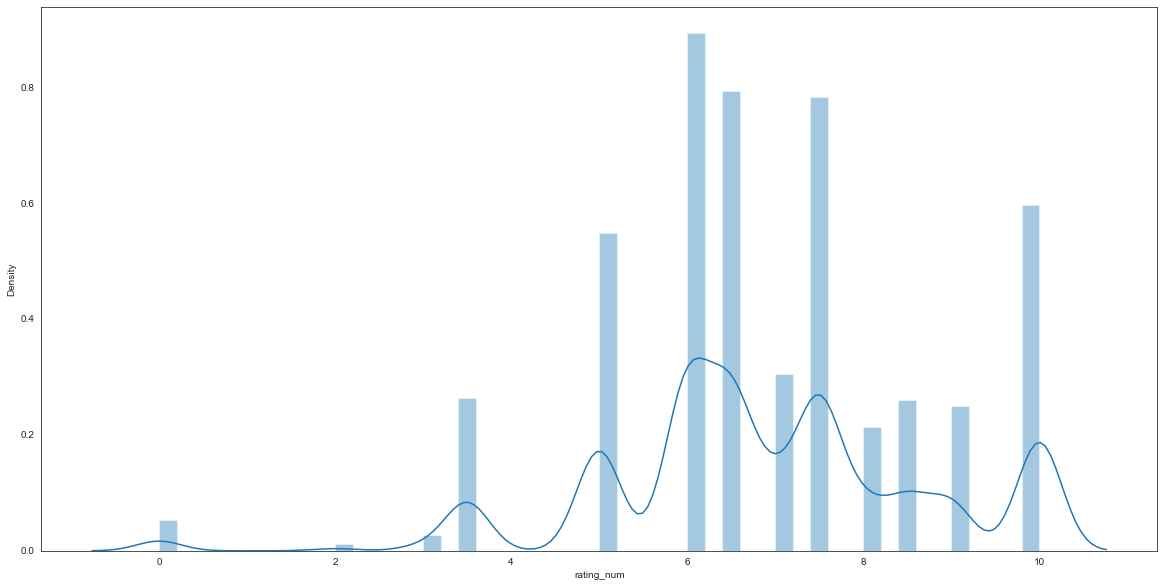

In [856]:
# Viewing target distribution

plt.figure(figsize=(20,10))

sns.distplot(target)

plt.show()

looks negatively skewed and migbt benefit from a log transform

In [857]:
# Check minimum value of target

np.min(target)

0.0

We have zero, so we have to use log1p

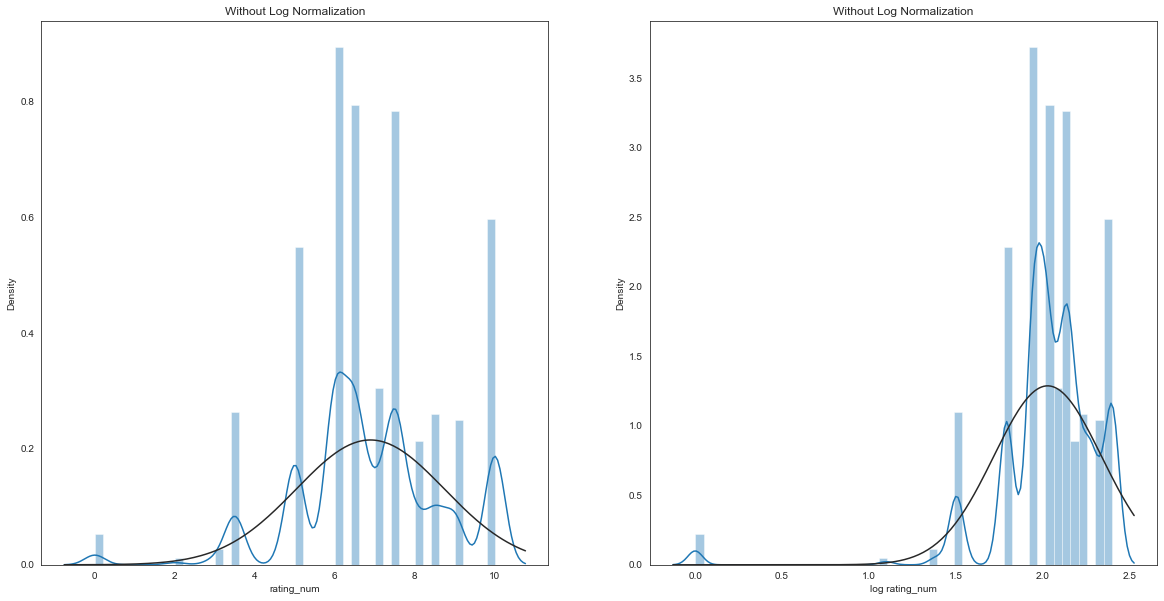

In [880]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Normalization")

plt.subplot(1,2,2)
sns.distplot(np.log1p(target), kde=True, fit=scipy.stats.norm)
plt.xlabel("log rating_num")
plt.title("Without Log Normalization")

plt.show()

In [861]:
log_target = np.log1p(target)

In [862]:
log_target

0        2.079442
1        2.014903
2        2.251292
3        2.197225
4        1.504077
           ...   
20448    1.791759
20449    1.945910
20450    1.791759
20451    1.945910
20452    1.945910
Name: rating_num, Length: 20453, dtype: float64

In [863]:
np.log1p(log_target)

0        1.124748
1        1.103568
2        1.179052
3        1.162283
4        0.917920
           ...   
20448    1.026672
20449    1.080418
20450    1.026672
20451    1.080418
20452    1.080418
Name: rating_num, Length: 20453, dtype: float64

### Split Data

Get final train and test sets

The data was splitted inti the same dimension as the original train and test sets

###### Train set

In [864]:
train_final = data6.loc[:train1.index.max(), :].copy()
train_final

player_height  player_weight  player_general_var_0  player_general_var_1  player_general_var_2  player_general_var_3  player_general_var_4  player_general_var_5  player_positional_raw_var_0  player_positional_raw_var_1  player_positional_raw_var_2  player_positional_raw_var_3  player_defensive_raw_var_4  player_defensive_raw_var_5  player_other_raw_var_6  player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  player_other_raw_var_10  player_offensive_raw_var_11  player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  player_positional_raw_var_15  player_positional_raw_var_16  player_positional_raw_var_17  player_other_raw_var_18  player_other_raw_var_19  player_other_raw_var_20  player_positional_raw_var_21  player_positional_raw_var_22  player_positional_raw_var_23  player_other_raw_var_24  player_other_raw_var_25  player_other_raw_var_26  player_other_raw_var_27  player_other_raw_var_28  player_other_raw_var_29  player_other_raw_var_30  player_offensive_raw_var_31  player_offensive_raw_var_32  player_other_raw_var_33  player_other_raw_var_34  player_other_raw_var_35  player_other_raw_var_36  player_other_raw_var_37  player_other_raw_var_38  player_other_raw_var_39  player_other_raw_var_40  player_other_raw_var_41  player_defensive_raw_var_42  player_defensive_raw_var_43  player_other_raw_var_44  player_other_raw_var_45  player_offensive_raw_var_46  player_other_raw_var_47  player_defensive_raw_var_48  player_offensive_raw_var_49  player_offensive_raw_var_50  player_other_raw_var_51  player_defensive_raw_var_52  player_offensive_raw_var_53  player_other_raw_var_54  player_positional_raw_var_55  player_other_raw_var_56  player_other_raw_var_57  player_other_raw_var_58  player_other_raw_var_59  player_offensive_raw_var_60  player_defensive_raw_var_61  player_defensive_raw_var_62  player_other_raw_var_63  player_other_raw_var_64  player_defensive_raw_var_65  player_defensive_raw_var_66  player_defensive_raw_var_67  player_other_raw_var_68  player_other_raw_var_69  player_defensive_raw_var_70  player_general_raw_var_71  player_general_raw_var_72  player_offensive_raw_var_73  player_defensive_raw_var_74  player_other_raw_var_75  player_other_raw_var_76  player_offensive_raw_var_77  player_general_raw_var_78  player_offensive_raw_var_79  player_other_raw_var_80  player_other_raw_var_81  player_other_raw_var_82  player_other_raw_var_83  player_other_raw_var_84  player_other_raw_var_85  player_positional_raw_var_86  player_offensive_raw_var_87  player_other_raw_var_88  player_other_raw_var_89  player_other_raw_var_90  player_other_raw_var_91  player_defensive_raw_var_92  player_defensive_raw_var_93  player_defensive_raw_var_94  player_defensive_raw_var_95  player_other_raw_var_96  player_defensive_raw_var_97  player_other_raw_var_98  player_other_raw_var_99  player_defensive_raw_var_100  player_other_raw_var_101  player_offensive_raw_var_102  player_other_raw_var_103  player_other_raw_var_104  player_offensive_raw_var_105  player_other_raw_var_106  player_other_raw_var_107  player_other_raw_var_108  player_other_raw_var_109  player_positional_raw_var_110  player_other_raw_var_111  player_other_raw_var_112  player_other_raw_var_113  player_general_raw_var_114  player_offensive_raw_var_115  player_offensive_raw_var_116  player_other_raw_var_117  player_other_raw_var_118  player_other_raw_var_119  player_offensive_raw_var_120  player_other_raw_var_121  player_offensive_raw_var_122  player_other_raw_var_123  player_other_raw_var_124  player_other_raw_var_125  player_offensive_raw_var_126  player_other_raw_var_127  player_other_raw_var_128  player_offensive_raw_var_129  player_offensive_raw_var_130  player_offensive_raw_var_131  player_other_raw_var_132  player_offensive_raw_var_133  player_other_raw_var_134  player_other_raw_var_135  player_other_raw_var_136  player_defensive_raw_var_137  player_offensive_raw_var_138  player_other_raw_var_139  player_other_raw_var_140  player_other_raw_var_141  pla

In [865]:
train1

scout_id  winner   team  competitionId  player_position_1  player_position_2  player_height  player_weight  player_general_var_0  player_general_var_1  player_general_var_2  player_general_var_3  player_general_var_4  player_general_var_5  player_positional_raw_var_0  player_positional_raw_var_1  player_positional_raw_var_2  player_positional_raw_var_3  player_defensive_raw_var_4  player_defensive_raw_var_5  player_other_raw_var_6  player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  player_other_raw_var_10  player_offensive_raw_var_11  player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  player_positional_raw_var_15  player_positional_raw_var_16  player_positional_raw_var_17  player_other_raw_var_18  player_other_raw_var_19  player_other_raw_var_20  player_positional_raw_var_21  player_positional_raw_var_22  player_positional_raw_var_23  player_other_raw_var_24  player_other_raw_var_25  player_other_raw_var_26  player_other_raw_var_27  player_other_raw_var_28  player_other_raw_var_29  player_other_raw_var_30  player_offensive_raw_var_31  player_offensive_raw_var_32  player_other_raw_var_33  player_other_raw_var_34  player_other_raw_var_35  player_other_raw_var_36  player_other_raw_var_37  player_other_raw_var_38  player_other_raw_var_39  player_other_raw_var_40  player_other_raw_var_41  player_defensive_raw_var_42  player_defensive_raw_var_43  player_other_raw_var_44  player_other_raw_var_45  player_offensive_raw_var_46  player_other_raw_var_47  player_defensive_raw_var_48  player_offensive_raw_var_49  player_offensive_raw_var_50  player_other_raw_var_51  player_defensive_raw_var_52  player_offensive_raw_var_53  player_other_raw_var_54  player_positional_raw_var_55  player_other_raw_var_56  player_other_raw_var_57  player_other_raw_var_58  player_other_raw_var_59  player_offensive_raw_var_60  player_defensive_raw_var_61  player_defensive_raw_var_62  player_other_raw_var_63  player_other_raw_var_64  player_defensive_raw_var_65  player_defensive_raw_var_66  player_defensive_raw_var_67  player_other_raw_var_68  player_other_raw_var_69  player_defensive_raw_var_70  player_general_raw_var_71  player_general_raw_var_72  player_offensive_raw_var_73  player_defensive_raw_var_74  player_other_raw_var_75  player_other_raw_var_76  player_offensive_raw_var_77  player_general_raw_var_78  player_offensive_raw_var_79  player_other_raw_var_80  player_other_raw_var_81  player_other_raw_var_82  player_other_raw_var_83  player_other_raw_var_84  player_other_raw_var_85  player_positional_raw_var_86  player_offensive_raw_var_87  player_other_raw_var_88  player_other_raw_var_89  player_other_raw_var_90  player_other_raw_var_91  player_defensive_raw_var_92  player_defensive_raw_var_93  player_defensive_raw_var_94  player_defensive_raw_var_95  player_other_raw_var_96  player_defensive_raw_var_97  player_other_raw_var_98  player_other_raw_var_99  player_defensive_raw_var_100  player_other_raw_var_101  player_offensive_raw_var_102  player_other_raw_var_103  player_other_raw_var_104  player_offensive_raw_var_105  player_other_raw_var_106  player_other_raw_var_107  player_other_raw_var_108  player_other_raw_var_109  player_positional_raw_var_110  player_other_raw_var_111  player_other_raw_var_112  player_other_raw_var_113  player_general_raw_var_114  player_offensive_raw_var_115  player_offensive_raw_var_116  player_other_raw_var_117  player_other_raw_var_118  player_other_raw_var_119  player_offensive_raw_var_120  player_other_raw_var_121  player_offensive_raw_var_122  player_other_raw_var_123  player_other_raw_var_124  player_other_raw_var_125  player_offensive_raw_var_126  player_other_raw_var_127  player_other_raw_var_128  player_offensive_raw_var_129  player_offensive_raw_var_130  player_offensive_raw_var_131  player_other_raw_var_132  player_offensive_raw_var_133  player_other_raw_var_134  player_other_raw_var_135  player_other_raw_var_136  player_defensive_raw_var_137  player_offensive_raw_var_138  pla

###### Test set

In [866]:
test_final = data6.loc[train1.index.max() + 1:, :].reset_index(drop=True).copy()
test_final

player_height  player_weight  player_general_var_0  player_general_var_1  player_general_var_2  player_general_var_3  player_general_var_4  player_general_var_5  player_positional_raw_var_0  player_positional_raw_var_1  player_positional_raw_var_2  player_positional_raw_var_3  player_defensive_raw_var_4  player_defensive_raw_var_5  player_other_raw_var_6  player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  player_other_raw_var_10  player_offensive_raw_var_11  player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  player_positional_raw_var_15  player_positional_raw_var_16  player_positional_raw_var_17  player_other_raw_var_18  player_other_raw_var_19  player_other_raw_var_20  player_positional_raw_var_21  player_positional_raw_var_22  player_positional_raw_var_23  player_other_raw_var_24  player_other_raw_var_25  player_other_raw_var_26  player_other_raw_var_27  player_other_raw_var_28  player_other_raw_var_29  player_other_raw_var_30  player_offensive_raw_var_31  player_offensive_raw_var_32  player_other_raw_var_33  player_other_raw_var_34  player_other_raw_var_35  player_other_raw_var_36  player_other_raw_var_37  player_other_raw_var_38  player_other_raw_var_39  player_other_raw_var_40  player_other_raw_var_41  player_defensive_raw_var_42  player_defensive_raw_var_43  player_other_raw_var_44  player_other_raw_var_45  player_offensive_raw_var_46  player_other_raw_var_47  player_defensive_raw_var_48  player_offensive_raw_var_49  player_offensive_raw_var_50  player_other_raw_var_51  player_defensive_raw_var_52  player_offensive_raw_var_53  player_other_raw_var_54  player_positional_raw_var_55  player_other_raw_var_56  player_other_raw_var_57  player_other_raw_var_58  player_other_raw_var_59  player_offensive_raw_var_60  player_defensive_raw_var_61  player_defensive_raw_var_62  player_other_raw_var_63  player_other_raw_var_64  player_defensive_raw_var_65  player_defensive_raw_var_66  player_defensive_raw_var_67  player_other_raw_var_68  player_other_raw_var_69  player_defensive_raw_var_70  player_general_raw_var_71  player_general_raw_var_72  player_offensive_raw_var_73  player_defensive_raw_var_74  player_other_raw_var_75  player_other_raw_var_76  player_offensive_raw_var_77  player_general_raw_var_78  player_offensive_raw_var_79  player_other_raw_var_80  player_other_raw_var_81  player_other_raw_var_82  player_other_raw_var_83  player_other_raw_var_84  player_other_raw_var_85  player_positional_raw_var_86  player_offensive_raw_var_87  player_other_raw_var_88  player_other_raw_var_89  player_other_raw_var_90  player_other_raw_var_91  player_defensive_raw_var_92  player_defensive_raw_var_93  player_defensive_raw_var_94  player_defensive_raw_var_95  player_other_raw_var_96  player_defensive_raw_var_97  player_other_raw_var_98  player_other_raw_var_99  player_defensive_raw_var_100  player_other_raw_var_101  player_offensive_raw_var_102  player_other_raw_var_103  player_other_raw_var_104  player_offensive_raw_var_105  player_other_raw_var_106  player_other_raw_var_107  player_other_raw_var_108  player_other_raw_var_109  player_positional_raw_var_110  player_other_raw_var_111  player_other_raw_var_112  player_other_raw_var_113  player_general_raw_var_114  player_offensive_raw_var_115  player_offensive_raw_var_116  player_other_raw_var_117  player_other_raw_var_118  player_other_raw_var_119  player_offensive_raw_var_120  player_other_raw_var_121  player_offensive_raw_var_122  player_other_raw_var_123  player_other_raw_var_124  player_other_raw_var_125  player_offensive_raw_var_126  player_other_raw_var_127  player_other_raw_var_128  player_offensive_raw_var_129  player_offensive_raw_var_130  player_offensive_raw_var_131  player_other_raw_var_132  player_offensive_raw_var_133  player_other_raw_var_134  player_other_raw_var_135  player_other_raw_var_136  player_defensive_raw_var_137  player_offensive_raw_var_138  player_other_raw_var_139  player_other_raw_var_140  player_other_raw_var_141  pla

### Feature Selection

### Model Selection

We train on train set and evaluate on test set

xgb_regressor
catboost
br
RandFor

In [799]:
#importing training models

from sklearn.linear_model import BayesianRidge, OrthogonalMatchingPursuit
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [867]:
models = {
    "catboost": cb.CatBoostRegressor( verbose=0),
    "ridge":Ridge(),
    "br": BayesianRidge(),
    "xgb": XGBRegressor(),
   "lgbm": LGBMRegressor()
}

In [868]:
#  Training

for name, model in models.items():
    model.fit(train_final, log_target)
    print(name + " trained")

catboost trained
ridge trained
br trained
xgb trained
lgbm trained


### Evaluate

Evaluating on test data

In [599]:
from sklearn.model_selection import KFold, cross_val_score

In [754]:
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result= np.expm1(np.sqrt(-cross_val_score(model, test_final, log_target, scoring="neg_mean_squared_error", cv=kf)))
    results[name] = result

In [ ]:
results

In [ ]:
for name, model in results.items():
    print("----------------\n" + name + "\n----------------")
    print(np.mean(result))
    print(np.std(result))

#### COmbine predictions (ensampling)

In [869]:
#checking format for sample submisiom

sample=pd.read_csv('sample_submission.csv')
sample

row_id  rating_num
0      14785           7
1      15125           7
2      13095           7
3       6079           7
4      16584           7
...      ...         ...
8769   21259           7
8770    9371           7
8771   23226           7
8772   26623           7
8773   13814           7

[8774 rows x 2 columns]

We would stack our top best models to create a final prediction

In [870]:
predict = (
    0.3 * np.expm1(models['catboost'].predict(test_final)) +
    0.3 * np.expm1(models['xgb'].predict(test_final)) +
    0.1 * np.expm1(models['ridge'].predict(test_final))+
    0.3 * np.expm1(models['lgbm'].predict(test_final))
 
)

In [871]:
predict

array([6.63944642, 5.2677416 , 5.68925543, ..., 5.66713259, 6.07862741,
       6.61303064])

In [872]:
final_prediction = pd.concat([test_ids, pd.Series(predict, name='rating_num')], axis =1)

In [873]:
final_prediction

row_id  rating_num
0      14785    6.639446
1      15125    5.267742
2      13095    5.689255
3       6079    6.049036
4      16584    6.152050
...      ...         ...
8769   21259    4.732662
8770    9371    8.873334
8771   23226    5.667133
8772   26623    6.078627
8773   13814    6.613031

[8774 rows x 2 columns]

In [874]:
#to csv

final_prediction.to_csv('submission0.csv', index=False, header=True)